# Projected Sea Surface Temperature changes between 1900 and 2100 in CM4

First let's import some python packages that we're going to need for this analysis:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Loading data

Next step is to load the content of the CMIP6 catalog, which will allow us to browse what data is available on the google cloud.

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,15
institution_id,33
source_id,73
experiment_id,103
member_id,141
table_id,29
variable_id,369
grid_label,10
zstore,269216
dcpp_init_year,60


We can refine our search by experiment type, variable,...

In [4]:
cat = col.search(experiment_id=['historical','ssp585'], table_id='Omon', variable_id='tos',
                 grid_label='gr', member_id='r1i1p1f1')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/E3SM-Project/E3SM-1-0/historic...,NaN
1,CMIP,E3SM-Project,E3SM-1-1-ECA,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/E3SM-Project/E3SM-1-1-ECA/hist...,NaN
2,CMIP,E3SM-Project,E3SM-1-1,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/E3SM-Project/E3SM-1-1/historic...,NaN
3,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/MRI/MRI-ESM2-0/historical/r1i1...,NaN
4,CMIP,NCAR,CESM2-FV2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r1i1...,NaN
5,CMIP,NCAR,CESM2-WACCM-FV2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN
6,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN
7,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r1i1p1f1...,NaN
8,CMIP,NIMS-KMA,KACE-1-0-G,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NIMS-KMA/KACE-1-0-G/historical...,NaN
9,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN


And then build a dictionary containing all the datasets that are of interest:

In [5]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|██████████████████████████████| 16/16 [00:03<00:00,  5.04it/s]


['CMIP.E3SM-Project.E3SM-1-1-ECA.historical.Omon.gr',
 'CMIP.NCAR.CESM2.historical.Omon.gr',
 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gr',
 'CMIP.E3SM-Project.E3SM-1-0.historical.Omon.gr',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr',
 'ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.Omon.gr',
 'ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.Omon.gr',
 'CMIP.NIMS-KMA.KACE-1-0-G.historical.Omon.gr',
 'ScenarioMIP.NIMS-KMA.KACE-1-0-G.ssp585.Omon.gr',
 'ScenarioMIP.NCAR.CESM2-WACCM.ssp585.Omon.gr',
 'CMIP.NCAR.CESM2-FV2.historical.Omon.gr',
 'CMIP.E3SM-Project.E3SM-1-1.historical.Omon.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr',
 'CMIP.NCAR.CESM2-WACCM-FV2.historical.Omon.gr',
 'CMIP.NCAR.CESM2-WACCM.historical.Omon.gr',
 'ScenarioMIP.MRI.MRI-ESM2-0.ssp585.Omon.gr']

Let's examine some of these datasets:

In [6]:
CM4_ssp585 = dset_dict['ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.Omon.gr']
CM4_ssp585

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, member_id: 1, time: 1032)
Coordinates:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tos        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             ScenarioMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   60225.0
    comment:                 <null ref>
    contact:                 gfdl.climate.model.info@noaa.gov
    creation_date:           2019-03-18T13:56:25Z
    data_specs_version:      01.00.27
    experiment:              update of RCP8.5 based on SSP5
    experiment_id:           ssp585
    external_variables:      areacello
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    grid:                    ocean data regridded from tripolar - nominal 0.2...
    grid_label:              gr
    history:                 File was processed by fremetar (GFDL analog of C...
    initialization_index:    1
    institution:             National Oceanic and Atmospheric Administration,...
    institution_id:          NOAA-GFDL
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    mip_era:                 CMIP6
    nominal_resolution:      1x1 degree
    parent_activity_id:      CMIP
    parent_experiment_id:    historical
    parent_mip_era:          CMIP6
    parent_source_id:        GFDL-CM4
    parent_time_units:       days since 1850-1-1
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocean
    references:              see further_info_url attribute
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    source_id:               GFDL-CM4
    source_type:             AOGCM
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Omon
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    tracking_id:             hdl:21.14100/22d8bfdc-67db-4669-84dc-70258040dac...
    variable_id:             tos
    variant_info:            N/A
    variant_label:           r1i1p1f1
    status:                  2019-08-13;created;by nhn2@columbia.edu
    intake_esm_varname:      tos
    intake_esm_dataset_key:  ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.Omon.gr

In [7]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, member_id: 1, time: 1980)
Coordinates:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tos        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36500.0
    comment:                 <null ref>
    contact:                 gfdl.climate.model.info@noaa.gov
    creation_date:           2019-02-23T03:08:17Z
    data_specs_version:      01.00.27
    experiment:              historical
    experiment_id:           historical
    external_variables:      areacello
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    grid:                    ocean data regridded from tripolar - nominal 0.2...
    grid_label:              gr
    history:                 File was processed by fremetar (GFDL analog of C...
    initialization_index:    1
    institution:             National Oceanic and Atmospheric Administration,...
    institution_id:          NOAA-GFDL
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    mip_era:                 CMIP6
    nominal_resolution:      1x1 degree
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl
    parent_mip_era:          CMIP6
    parent_source_id:        GFDL-CM4
    parent_time_units:       days since 0001-1-1
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocean
    references:              see further_info_url attribute
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    source_id:               GFDL-CM4
    source_type:             AOGCM
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Omon
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    tracking_id:             hdl:21.14100/9aa58d2e-fe98-4527-b6e7-bec17f4bb97...
    variable_id:             tos
    variant_info:            N/A
    variant_label:           r1i1p1f1
    status:                  2019-08-07;created;by nhn2@columbia.edu
    intake_esm_varname:      tos
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr

## Making a test computation

We can compute the annual average SST for year 1900 (from historical run) and 2100 (from ssp585 run)
and compute the difference:

In [8]:
sst_1900 = CM4_hist['tos'].sel(time='1900').mean(dim='time')

In [9]:
sst_1900

<xarray.DataArray 'tos' (member_id: 1, lat: 180, lon: 360)>
dask.array<mean_agg-aggregate, shape=(1, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * member_id  (member_id) <U8 'r1i1p1f1'

In [10]:
sst_2100 = CM4_ssp585['tos'].sel(time='2100').mean(dim='time')

In [11]:
sst_2100

<xarray.DataArray 'tos' (member_id: 1, lat: 180, lon: 360)>
dask.array<mean_agg-aggregate, shape=(1, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * member_id  (member_id) <U8 'r1i1p1f1'

In [12]:
delta_sst = sst_2100 - sst_1900

## Basic plot (visual check of results)

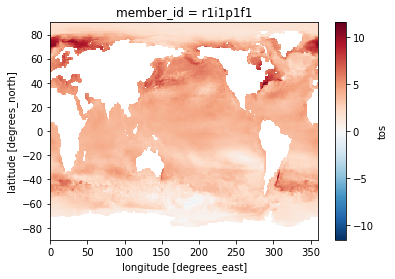

In [13]:
delta_sst.plot()

## Nicer plot (for your report/paper)

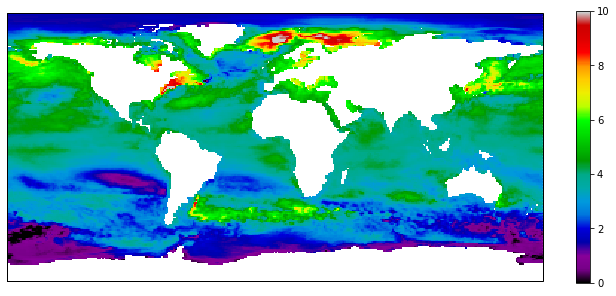

In [14]:
plt.figure(figsize=[12, 10])
ax = plt.axes(projection=ccrs.PlateCarree())
C = delta_sst.plot(ax=ax, x='lon', y='lat',
                   vmin=0, vmax=10, cmap='nipy_spectral',
                   transform=ccrs.PlateCarree(),
                   add_colorbar=False,
                   add_labels=False)
plt.colorbar(C, shrink=0.5)